## Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor, StackingRegressor
import joblib

## Loading the Dataset

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [4]:
df.shape

(5000, 37)

In [5]:
df.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2242.846274,64.618473,944.666618,33.756563,95.513467,39.787329,1.624964,4.486533,3227.300221,111.958521,...,0.564676,0.070378,5.114420e-07,-0.000448,0.018638,0.009758,0.009758,2.005098,0.564676,0.070378
std,1853.845285,16.858102,572.705322,16.121002,4.200091,46.887627,1.793648,4.200091,1957.986129,330.772146,...,1.738594,0.706996,1.662361e-04,0.000878,0.005468,0.003953,0.003953,0.378332,1.738594,0.706996
min,182.001656,19.492924,105.352082,2.218141,70.677164,0.063182,0.002234,0.013127,393.870306,2.410311,...,-1.851368,-2.130673,-1.049175e-03,-0.004361,0.008992,0.003645,0.003645,1.188950,-1.851368,-2.130673
25%,1009.686180,52.998781,547.027436,21.775991,93.560684,10.946137,0.347487,1.241594,1863.994785,14.529600,...,-0.347156,-0.340853,-7.130486e-05,-0.000911,0.014335,0.006999,0.006999,1.744527,-0.347156,-0.340853
50%,1705.183308,66.792593,779.619006,31.364370,96.583947,24.939947,1.023576,3.416053,2826.860362,28.273553,...,0.065799,-0.042454,1.639271e-06,-0.000297,0.017363,0.008766,0.008766,1.936696,0.065799,-0.042454
75%,2678.847972,77.328811,1199.089822,44.458585,98.758406,45.549542,2.276872,6.439316,4085.011726,79.541694,...,0.782407,0.342719,6.955046e-05,0.000161,0.021882,0.011538,0.011537,2.220642,0.782407,0.342719
max,12278.649761,97.703187,3211.424686,77.507972,99.986873,359.927420,12.533266,29.322836,13119.276456,7617.164272,...,16.367846,3.626919,9.518686e-04,0.002038,0.036017,0.026660,0.026660,3.676899,16.367846,3.626919


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [7]:
df.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

## Exploratory Data Analysis

In [8]:
plt.style.use('seaborn-whitegrid')

/var/folders/wy/jn67mg9x47g2xg96cc6wzc_40000gn/T/ipykernel_36749/2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


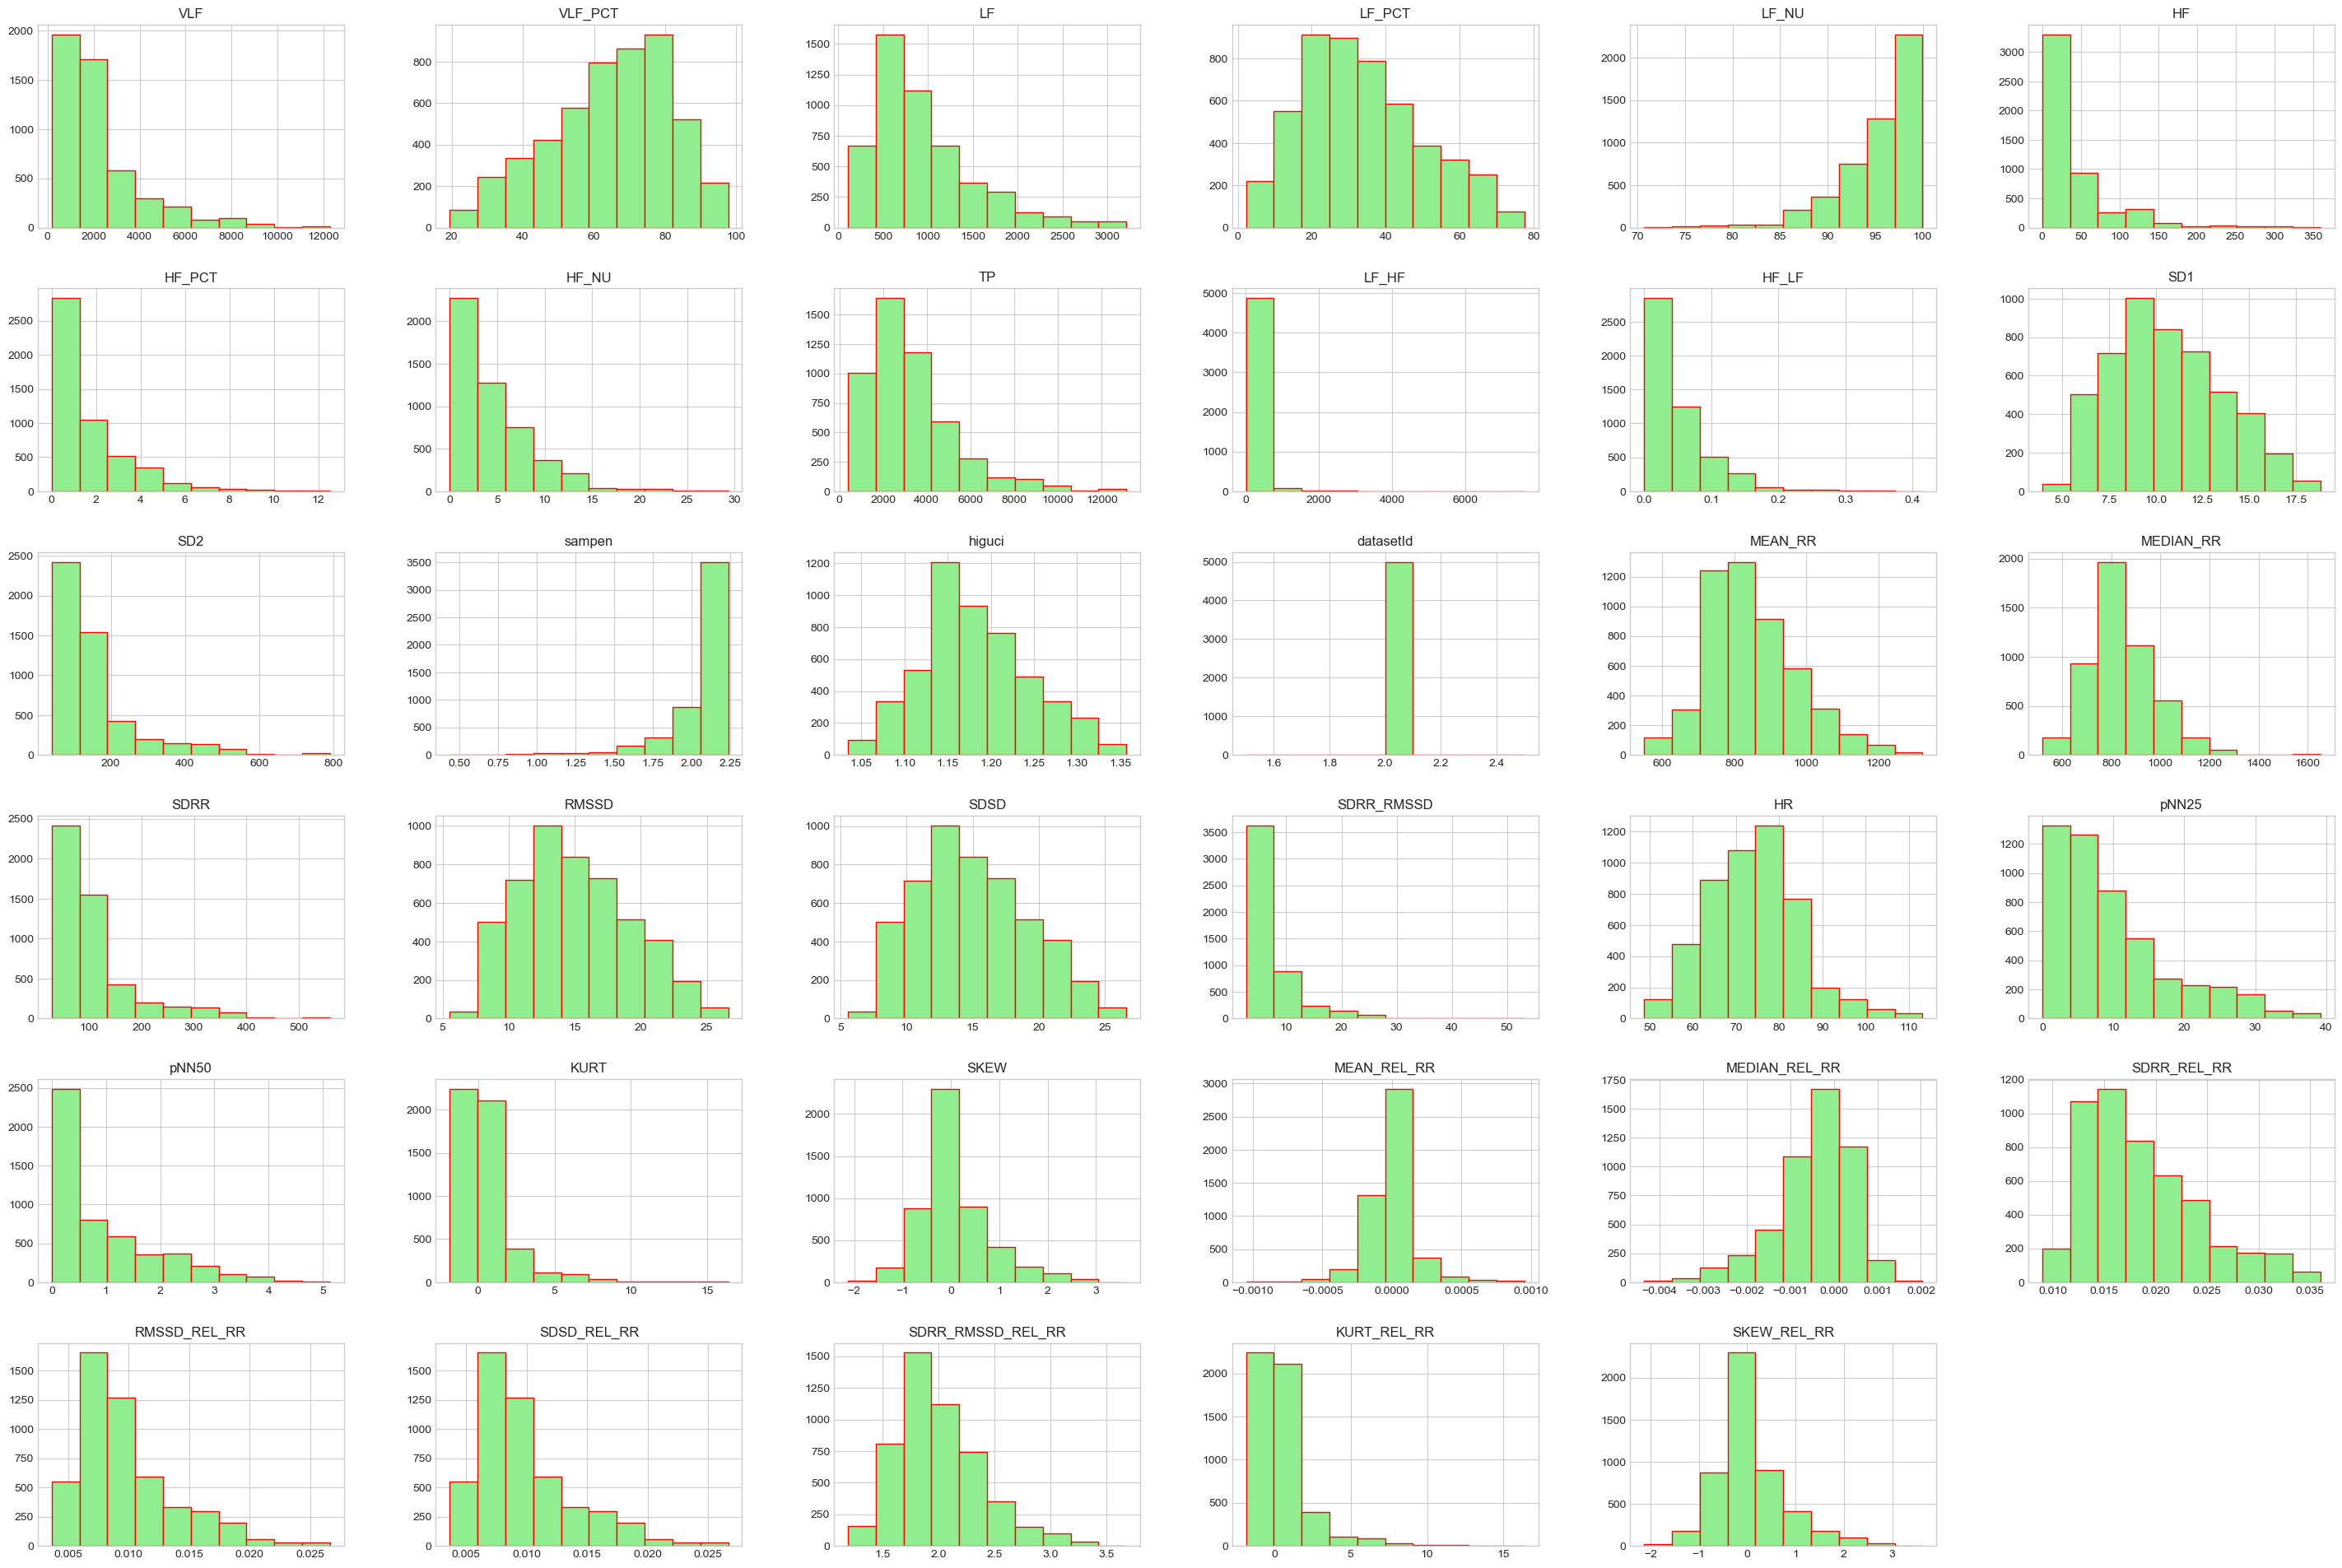

In [9]:
df.hist(figsize=(36, 24), color='lightgreen', edgecolor='red')

plt.show()

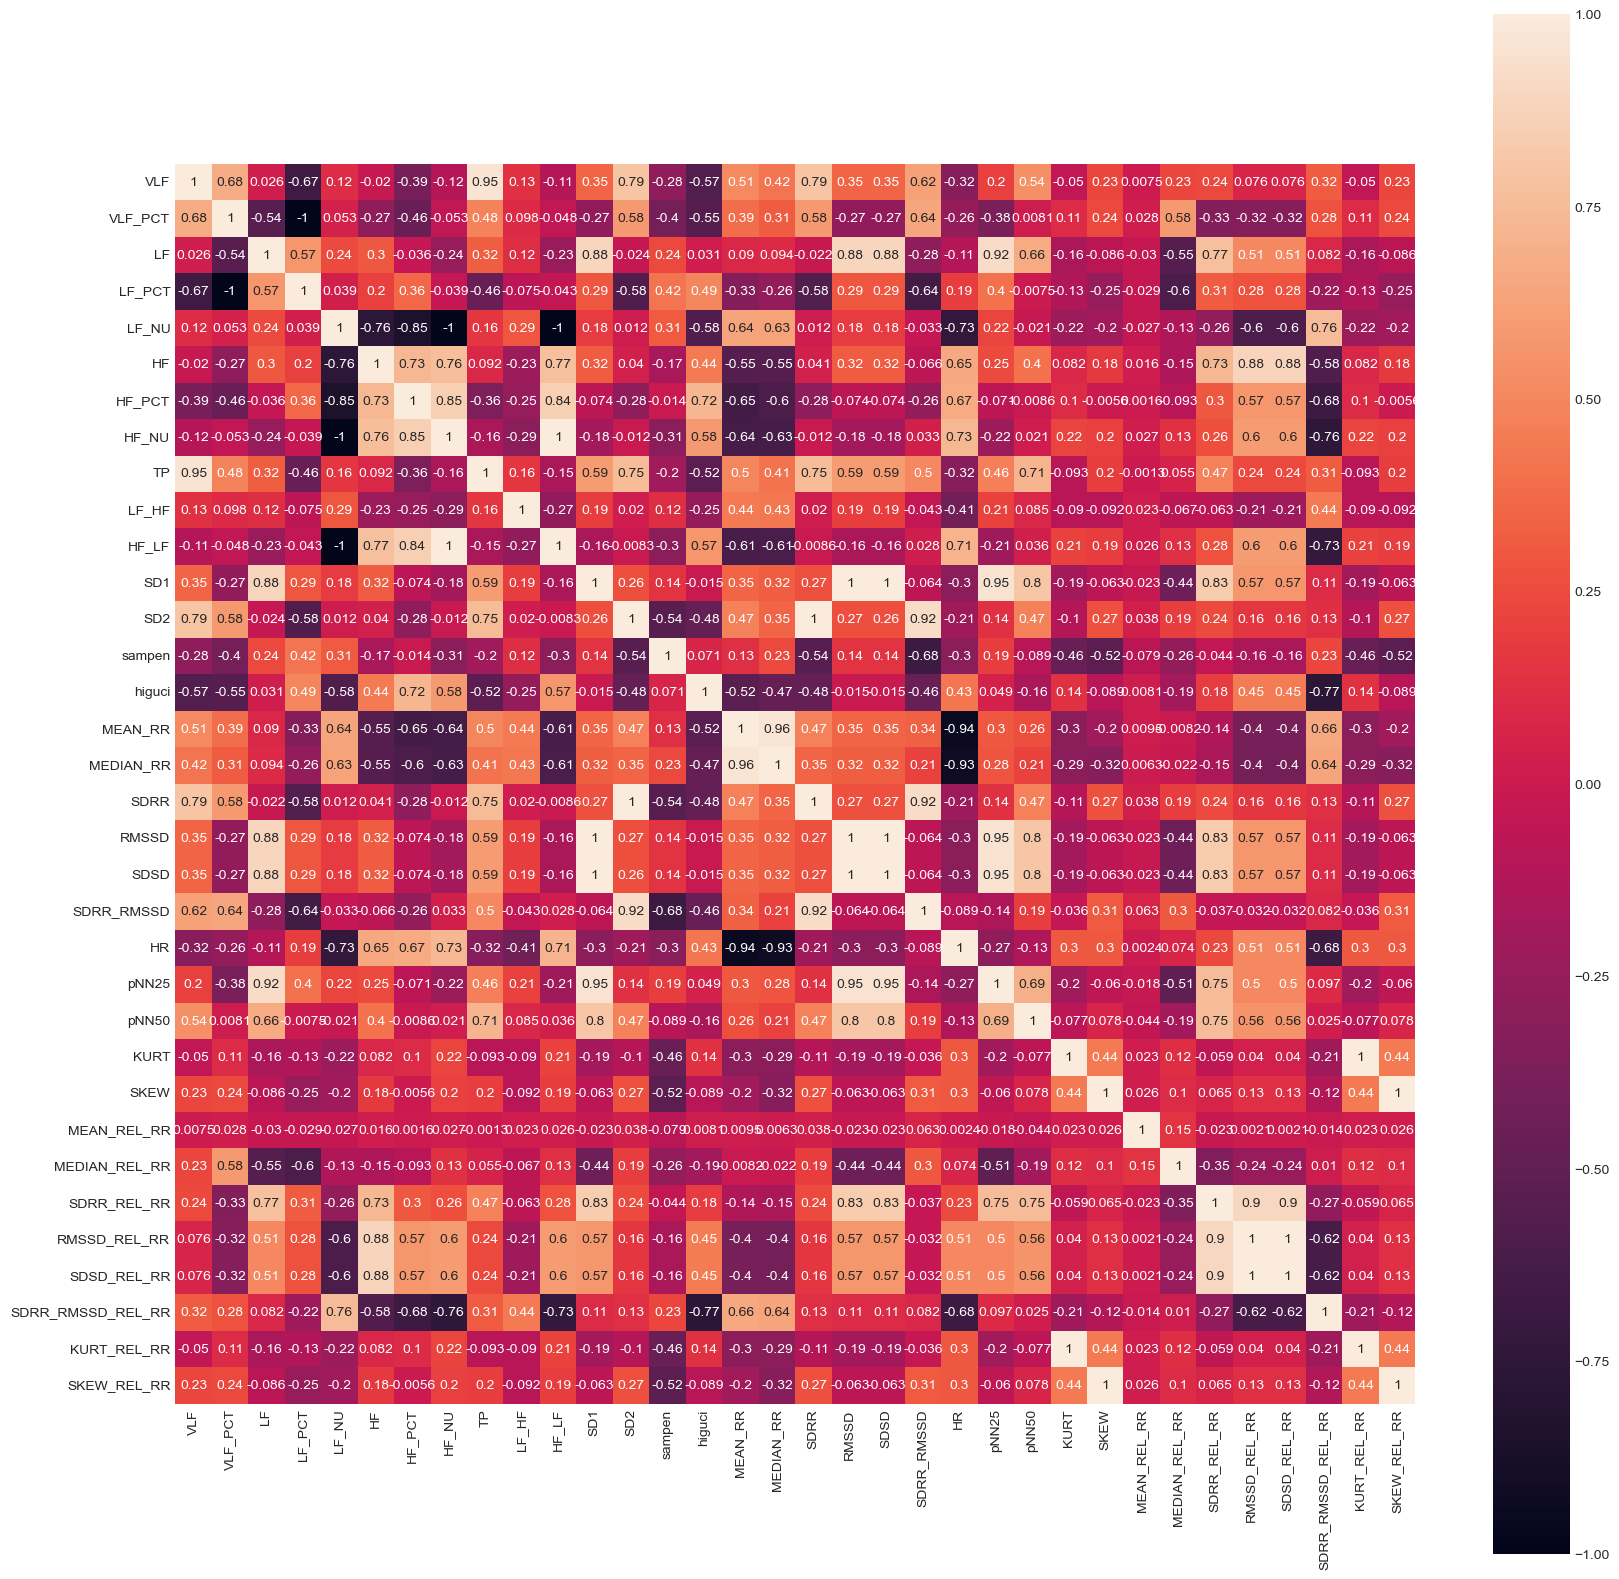

In [10]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.drop(columns=['uuid', 'datasetId', 'condition']).corr(), square=True,annot=True)
plt.show()

In [11]:
df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

## Splitting into train and test set

In [12]:
# Extract features and target variable
X = df.drop(columns=['uuid', 'datasetId', 'condition', 'HR'])
y = df['HR']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Define the base estimators
ridge_cv_estimator = RidgeCV()
extra_trees_estimator = ExtraTreeRegressor(
    max_features=0.9500000000000001,
    min_samples_split=10,
    random_state=42
)

# Create the StackingRegressor with ExtraTreesRegressor as the final estimator
stacking_model = StackingRegressor(
    estimators=[
        ('ridgecv', ridge_cv_estimator),
        ('extratrees', extra_trees_estimator)
    ],
    final_estimator=ExtraTreesRegressor(
        max_features=0.9500000000000001,
        min_samples_split=10,
        random_state=42
    )
)

In [15]:
# Replace 'X_train' and 'y_train' with your actual training data
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('ridgecv', RidgeCV()),
                              ('extratrees',
                               ExtraTreeRegressor(max_features=0.9500000000000001,
                                                  min_samples_split=10,
                                                  random_state=42))],
                  final_estimator=ExtraTreesRegressor(max_features=0.9500000000000001,
                                                      min_samples_split=10,
                                                      random_state=42))

## Saving the model

In [16]:
# Save the trained model to a file using joblib
joblib.dump(stacking_model, 'stacking_model.joblib')

['stacking_model.joblib']

## Evaluation Metrics

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [18]:
# Predictions on the test set
y_pred = stacking_model.predict(X_test)

In [19]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [20]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [21]:
# R-squared
r2 = r2_score(y_test, y_pred)

In [22]:
# Display metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.35
Mean Squared Error: 0.37
R-squared: 1.00


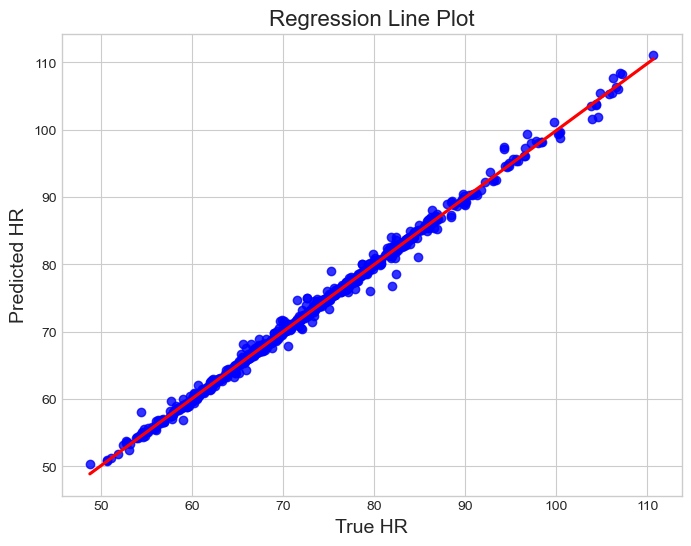

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('True HR', fontsize=14)
plt.ylabel('Predicted HR', fontsize=14)
plt.title('Regression Line Plot', fontsize=16)
plt.grid(True)
plt.show()

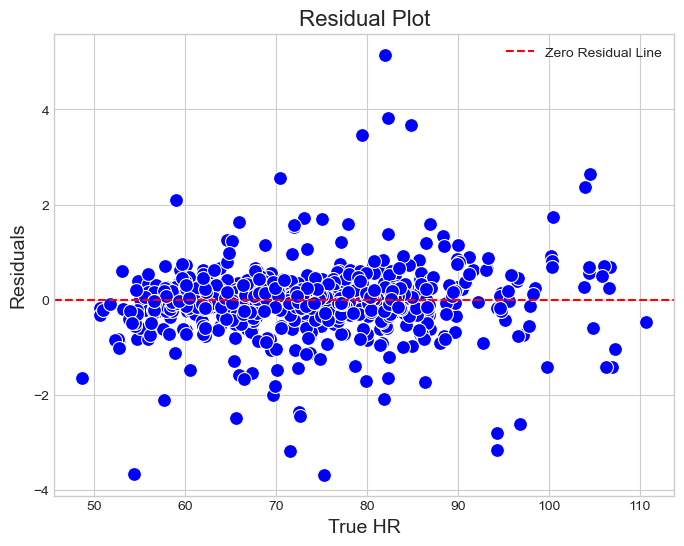

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue', s=100)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('True HR', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()